**Decision Tree**

O Algorítimo cria uma árvore de decisão baseado nos dados de treinamento para classificar novos registros

Vantagens :

- Fácil interpretação / entendimento
- Os dados não precisam ser normalizados ou padronizados para treinar o modelo
- Bastante rápido para classificar novos registros


Desvantagens :
- Potencial para a criação de árvores muito complexas (lembrando que a construção da mesma problema np-completo)
- Tem problemas de variância (pouca sensibilidade a mudanças na base de treinamento o que acaba levando a overfiting). As vezes é preciso "podar" a base de treinamento


In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# carregando a base de dados de  risco de credito
df = pd.read_csv('../../res/risco-credito.csv')
df

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [90]:
# separando os atributos previsores e os classivicadores
previsores = df.iloc[:,0:4].values
classificadores = df.iloc[:,4].values

In [91]:
# transformando os valores categoricos do atributos previsores em valores discretos

labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
#previsores

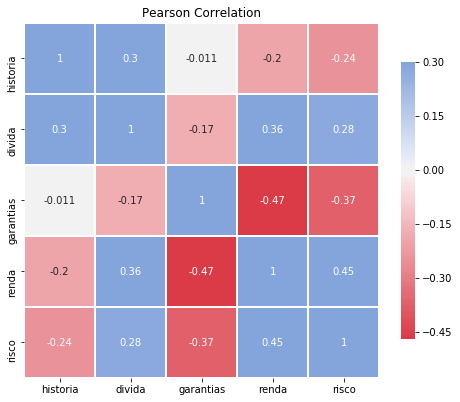

In [92]:
# Criando uma tabela de correlacao de pearson para entender a correlacao entre as variaveis

#gerando uma copia dos dados com a label encodada
alldata= previsores.copy()
alldata=np.append(alldata,classificadores.reshape(-1,1),axis=1)
alldata[:,4] = labelencoder.fit_transform(alldata[:,4])
#print(alldata)
alldata=alldata.astype(float)
alldata =pd.DataFrame(alldata,columns=df.columns)
#gerando a matriz de correlacao a partir destes dados

corr = alldata.corr()
#print(alldata)
#print(corr)
ds=len(alldata.columns)



cmap = sns.diverging_palette(10, 255, as_cmap=True)

plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.title("Pearson Correlation")
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1, annot=True, cbar_kws={"shrink": .5})
ax.set_ylim(ds, 0)

plt.tight_layout()
plt.show()


In [93]:
# instanciando o naive bayes do scikitlearn
#classificador = GaussianNB()
classificador = DecisionTreeClassifier(criterion='entropy')
classificador.fit(previsores, classificadores)

#verificando a importancia de cada feature para o algoritimo
print(classificador.feature_importances_)


#Criando dois registros para que o algoritimo classifique


# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
resultado = classificador.predict([[0,0,1,2], [3, 0, 0, 0]])

print (resultado)

#classes 
print(classificador.classes_)

#numero de ocorrencias de cada base
#print(classificador.class_count_)

#olhar a tabela do documento
#print(classificador.class_prior_)

[0.41391643 0.06408636 0.03885431 0.4831429 ]
['baixo' 'alto']
['alto' 'baixo' 'moderado']
